Logistic Regression adalah salah satu teknik yang digunakan untuk permasalahan klasifikasi data. dan nilai yang akan diprediksi bersifat kategori, tidak seperti linear regression yang nilai yang akan diprediksinya adalah nilai kontinyu. Contoh penerapannya adalah sebagai berikut : <br>
- Menentukan apakah suatu email adalah email spam atau tidak ? <br>
- Apakah seorang customer akan membeli asuransi jiwa ? <br>
- Partai apakah yang akan divote oleh seseorang ? apakah demokrat, republik, atau independen. <br>

Ada 2 jenis klasifikasi : <br>
1. Binary Clasification yang outputnya hanya YA dan TIDAK, seperti pada 2 contoh pertama di atas. <br>
2. Multiclass Classification yang outputnya bukan binary, seperti pada contoh ketiga di atas. <br>

# 1. Single Variable (1 Variabel)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bc_df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/7_logistic_reg/insurance_data.csv')
bc_df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


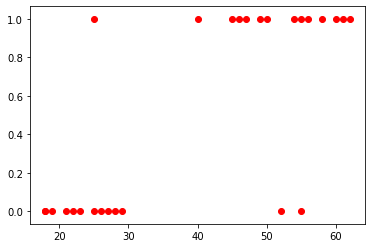

In [3]:
plt.scatter(bc_df.age, bc_df.bought_insurance, color='red')

In [4]:
bc_df.shape

(27, 2)

In [5]:
# kita split dataset terlebih dahulu menggunakan fungsi train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(bc_df[['age']], bc_df.bought_insurance, test_size=0.1)

In [6]:
x_test

,age
3,52
17,58
5,56


In [7]:
x_train

,age
11,28
15,55
25,54
6,55
10,18
18,19
8,62
14,49
24,50
9,61


In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [9]:
model.predict(x_test) # 1 berarti ya

array([1, 1, 1])

In [10]:
model.score(x_test, y_test) # mengecek akurasi model

0.6666666666666666

In [11]:
# menampilkan probabilitas dari prediksi
model.predict_proba(x_test)

array([[0.08167863, 0.91832137],
       [0.03298034, 0.96701966],
       [0.04483951, 0.95516049]])

matrix kiri mewakili usia, dan kanan adalah kemungkinan membeli asuransi yang jika nilainya di atas 0.5 kemunginannya adalah YA

In [12]:
model.predict([[25]]) # jika outputnya 1 maka kemungkinannya adalah YA, dan jika 0 kemungkinannya adalah TIDAK

/home/humaid/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

### Latihan Binary Classification

In [13]:
hr = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/7_logistic_reg/Exercise/HR_comma_sep.csv')
hr.head(100)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
95,0.37,0.51,2,155,3,0,1,0,sales,low
96,0.10,0.77,6,265,4,0,1,0,sales,low
97,0.10,0.84,6,279,4,0,1,0,sales,low
98,0.11,0.97,6,284,4,0,1,0,sales,low


#### Eksplorasi dan Visualisasi Data

In [14]:
# Melihat berapa banyak yang akan diphk
left = hr[hr.left==1]
left.shape

(3571, 10)

In [15]:
# Melihat berapa banyak yang akan dipertahankan
retained = hr[hr.left==0]
retained.shape

(11428, 10)

In [16]:
# Rata rata dari setiap kolom
hr.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


dari tabel di atas, kita mendapat kesimpulan berikut : <br>
1. 'satisfaction level' : tingkat kepuasan karyawan yang akan diphk tampaknya relatif rendah (0.44) dibanding dengan yang akan dipertahankan (0.66). <br>
2. 'average monthly hours' : rata rata jam kerja bulanan orang yang akan diphk lebih tinggi (207 berbanding 199). <br>
3. 'promotion last 5 years' : kebanyakan karyawan karyawan yang mendapatkan promosi pada 5 tahun terakhir akan dipertahankan.

#### Dampak Besarnya Gaji Terhadap Dipertahankannya Karyawan

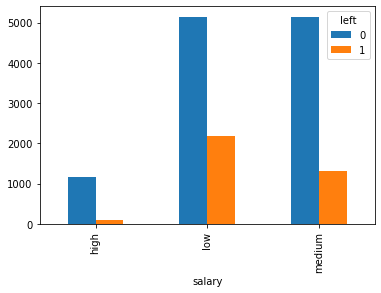

In [17]:
pd.crosstab(hr.salary, hr.left).plot(kind='bar')

dari grafik di atas menunjukkan bahwa kebanyakan karyawan bergaji tinggi tidak akan diphk

#### Tingkat Dipertahankannya Karyawan Berdasarkan Departmentnya

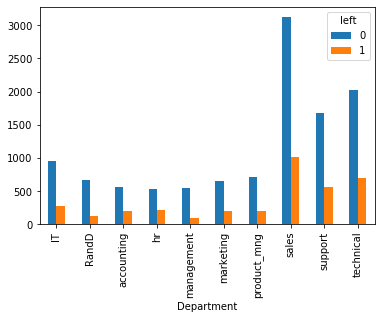

In [18]:
pd.crosstab(hr.Department, hr.left).plot(kind='bar')

Dari bagan di atas tampaknya ada beberapa dampak departemen pada retensi karyawan tetapi itu tidak besar sehingga kita akan mengabaikan departemen dalam analisis kami

Dari analisis data di atas sejauh ini dapat kita simpulkan bahwa kita akan menggunakan variabel berikut sebagai variabel independen dalam model kita : <br>
1. Satisfaction Level. 
2. Average Monthly Hours.
3. Promotion Last 5 Years.
4. Salary.

In [19]:
subdf = hr[['satisfaction_level','average_montly_hours','promotion_last_5years', 'salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


#### Menangani Variabel Dummy

Data dalam kolom salary berbentuk teks. kita harus merubahnya ke bentuk angka, dan kita akan menggunakan dummy variable untuk melakukan hal tersebut.

In [20]:
salary_dummies = pd.get_dummies(subdf.salary, prefix='salary')

In [21]:
df_with_dummies = pd.concat([subdf, salary_dummies], axis='columns')

In [22]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


Sekarang kita buang kolom salary yang isinya data berbentuk teks

In [23]:
df_with_dummies.drop(columns='salary')

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [24]:
df_with_dummies.drop(columns='salary', inplace=True)

In [25]:
x = df_with_dummies
x.head

<bound method NDFrame.head of        satisfaction_level  average_montly_hours  promotion_last_5years  \
0                    0.38                   157                      0   
1                    0.80                   262                      0   
2                    0.11                   272                      0   
3                    0.72                   223                      0   
4                    0.37                   159                      0   
...                   ...                   ...                    ...   
14994                0.40                   151                      0   
14995                0.37                   160                      0   
14996                0.37                   143                      0   
14997                0.11                   280                      0   
14998                0.37                   158                      0   

       salary_high  salary_low  salary_medium  
0                0           1   

In [26]:
y = hr.left

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.3)

In [28]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [29]:
model.fit(x_train, y_train)

LogisticRegression()

In [30]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
model.score(x_test,y_test)

0.7705714285714286

##### Dibawah ini adalah kegagalan saya. gunakan sebagai pembelajaran

Logistic Regression dengan banyak variabel independen

In [32]:
hr.shape

(14999, 10)

In [33]:
# splitting model
from sklearn.model_selection import train_test_split

train, test = train_test_split(hr, test_size=0.1)

In [34]:
train.shape

(13499, 10)

In [35]:
test.shape # kira2 test sebanyak 25% dari total data

(1500, 10)

In [36]:
train.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
12446,0.44,0.46,2,143,3,0,1,0,IT,low
1346,0.73,0.95,4,223,6,0,1,0,support,low
11800,0.67,0.91,2,245,2,1,0,1,sales,medium
6962,0.87,0.86,3,196,4,0,0,0,sales,low
13614,0.48,0.67,4,220,3,0,0,1,management,medium


In [37]:
train_feat = train.iloc[:,:5] # feature adalah variabel independen (dari data di atas yang terpenting 5 kolom awal)
train_targ = train['left'] # variabel target

In [38]:
type(train_targ)

pandas.core.series.Series

In [39]:
from sklearn.linear_model import LogisticRegression

hrModel = LogisticRegression()
hrModel.fit(train_feat, train_targ)

LogisticRegression()

In [40]:
hrModel.score(train_feat, train_targ)

0.7673901770501519

In [41]:
hrModel.coef_

array([[-4.07121885,  0.6858378 , -0.2905366 ,  0.00445233,  0.1965609 ]])

In [42]:
hrModel.intercept_

array([0.10153384])

In [43]:
hrModel.predict(test.iloc[:,:5])

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
hrModel.predict_proba(test.iloc[:,:5])

array([[0.96402981, 0.03597019],
       [0.94022149, 0.05977851],
       [0.69662526, 0.30337474],
       ...,
       [0.90370628, 0.09629372],
       [0.76119819, 0.23880181],
       [0.8349554 , 0.1650446 ]])

# 2. Multiple Variables (Banyak Variabel)

Di sini kita akan mencontohkan penggunaan multiclass variable untuk klasifikasi digit angka dari tulisan tangan

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

# menggunakan dataset bawaan dari scikit learn (nama datasetnya adalah load_digits)
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
# mengecek isi dari training set
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
# melihat elemen pertama pada data (ukuran setiap gambar adalah 8x8)
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

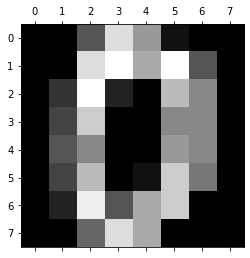

In [6]:
# melihat rupa dari suatu elemen
plt.gray()
plt.matshow(digits.images[0])

<Figure size 432x288 with 0 Axes>

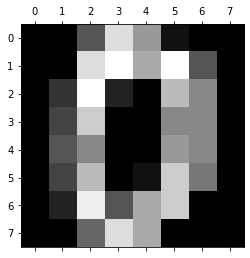

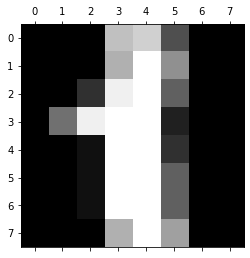

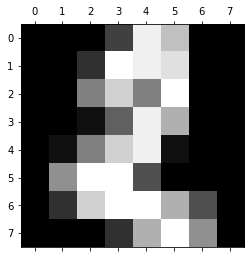

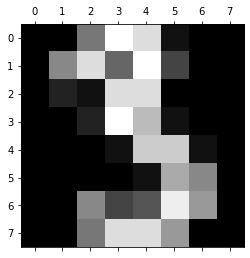

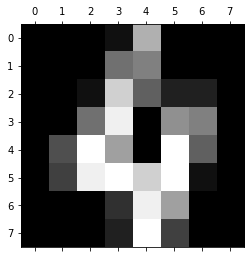

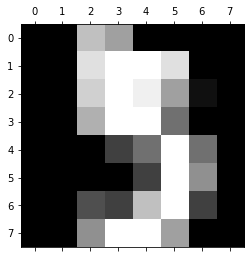

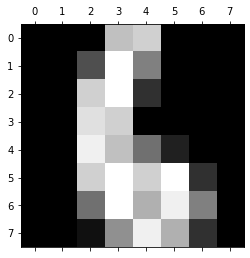

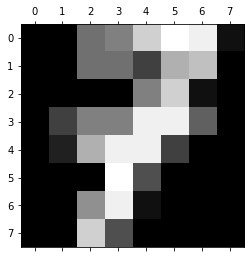

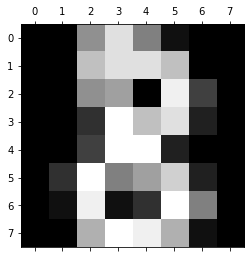

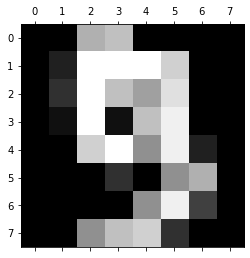

In [7]:
# melihat rupa dari beberapa elemen
plt.gray()
for i in range(10):
    plt.matshow(digits.images[i])

In [13]:
# melihat target (target dari gambar sampel)
digits.target[0:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# memisah dataset menjadi training dataset dan test sample
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)
# arti test_size=0.2 adalah 20% dari dataset akan menjadi ikut bagian test dan sisanya ikut bagian train.

In [16]:
len(x_train)

1347

In [17]:
len(x_test)

450

In [18]:
from sklearn.linear_model import LogisticRegression
# membuat objek dari kelas LogisticRegression
model = LogisticRegression()

In [19]:
# training model
model.fit(x_train, y_train)

/home/humaid/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
# mengecek score dari model (mengecek score dengan membandingkan hasil dari x_train, y_train dengan x & y _test)
model.score(x_test, y_test)

0.9688888888888889

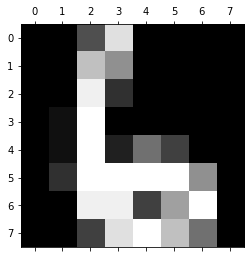

In [21]:
# mengambil sampel secara random (saya pilih yang ada pada indeks 67)
plt.matshow(digits.images[67])

In [22]:
# mengecek apakah digit pada gambar
digits.target[67]

6

In [23]:
# memprediksi data
model.predict([digits.data[67]])

array([6])

In [25]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

### Confusion Matrix
skor yang kita dapat dari model adalah 0.968, saya ingin melihat dimanakah model tidak bekerja dengan baik (letak error model). Untuk melakukan hal tersebut kita harus menggunakan cara confusion matrix

In [30]:
y_predicted = model.predict(x_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted) # y_test adalah nilai truth
cm

array([[44,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 45,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 50,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 51,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  1, 45,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 44,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 37,  0,  0],
       [ 0,  1,  1,  0,  0,  3,  0,  0, 39,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  0,  1, 43]])

Text(69.0, 0.5, 'Truth')

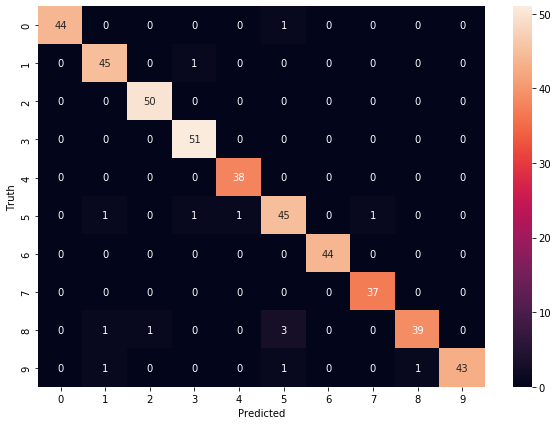

In [31]:
# memvisualisasi confusion matrix
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

pada kolom 1 artinya adalah kita punya angka 44 yang artinya 44 kali nilai truthnya adalah 0 dan model kita memprediksinya sebagai 0. <br>
pada kolom 2 artinya adalah kita punya angka 45 yang artinya 45 kali nilai truthnya adalah 1 dan model kita salah memprediksnya yang seharusnya 1 malah diprediksi 5 sebanyak 1 kali, dan yang seharusnya 1 malah diprediksi 8 sebanyak 1 kali, dan yang seharusnya 1 malah diprediksi 9 sebanyak 1 kali. <br>
begitupun seterusnya

### Latihan

Gunakan dataset sklearn iris flower untuk train model logistic regression. Kamu harus mencari tahu berapa akurasi modelmu menggunakannya untuk memprediksi berbagai macam sampel pada dataset. Pada dataset iris terdapat 150 sampel yang memiliki features berikut : 
1. Panjang Sepal
2. Lebar Sepal
3. Panjang Petal
4. Lebar Petal

Gunakan 4 features di atas mengklasifikasi salah satu bunga dari 3 kategori berikut :
1. Setosa
2. Versicolour
3. Virginica

In [32]:
from sklearn.datasets import load_iris

iris = load_iris()

In [46]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [33]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [34]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size=0.2)

In [39]:
len(X_train)

120

In [40]:
len(X_test)

30

In [41]:
from sklearn.linear_model import LogisticRegression
irisModel = LogisticRegression()

In [43]:
irisModel.fit(X_train, Y_train)

/home/humaid/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
irisModel.score(X_test,Y_test)

0.9333333333333333

In [48]:
# memprediksi SL = 6, SW = 3, PL = 5, PW = 2
irisModel.predict([[6, 3, 5, 2]])
# jawaban 1 adalah setosa
# jawaban 2 adalah versiclor
# jawaban 3 adalah virginica

array([2])